In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib
import ast

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
Features = ['Speical_Char','Have_IP', 'Have_At','URL_length' ,'URL_Depth','redirection', 'time_get_redirect',
                        'port_in_url','use_http', 'http_in_domain','TinyURL', 'Prefix/Suffix', 'DNS_Record','trusted_ca',
                        'domain_lifespan', 'domain_timeleft', 'same_asn','iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','eval','unescape',
                        'escape', 'ActiveXObject','fromCharCode','atob','Punny_Code']

In [15]:
df_origin = pd.read_csv("dataset/chongluadaov2.csv")
del df_origin['type']
df_train = pd.read_csv("cld.csv",names= ['url','features','labels'])

In [13]:
df_train['labels'].dtype

dtype('int64')

In [6]:
df_origin['labels'].dtype

dtype('int64')

In [7]:
inner = pd.merge(left=df_origin, right=df_train, left_on=['url','labels'], right_on=['url','labels'],how='left')
# del inner['urls']

In [8]:
inner.dropna(subset = ["features"], inplace=True)
inner

,url,labels,type,features
5,http://jezebel.com/goodbye-revenge-ill-miss-ou...,0,train,"[2, 0, 0, 1, 1, 5, 1, 0, 1, 0, 0, 0, 0, 1, 0, ..."
12,http://wickedweaver.com/,1,train,"[2, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
16,https://mail.google.com/a/recordedbooks.com,0,val,"[4, 0, 0, 0, 2, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
33,http://richsportsmgmt.com/media/mod_languages/...,1,test,"[3, 0, 0, 1, 4, 5, 0, 0, 1, 0, 1, 0, 0, 1, 0, ..."
35,http://www.i-m.mx/WEBMASTER8d/emailquota/,1,train,"[3, 0, 0, 0, 2, 5, 1, 0, 1, 0, 0, 1, 0, 1, 0, ..."
...,...,...,...,...
124328,https://plus.google.com/+Duoborgatto,0,train,"[4, 0, 0, 0, 1, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
124330,https://www.ringcentral.com/products/sf2002.asp,0,val,"[4, 0, 0, 0, 2, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
124331,https://plus.google.com/+BeautymissionPl/posts,0,val,"[4, 0, 0, 0, 2, 6, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
124332,https://bit.ly/3vAfEWG,1,train,"[2, 0, 0, 0, 1, 6, 1, 1, 0, 0, 1, 0, 0, 1, 0, ..."


In [41]:
list(df_train['labels']).count(0)

59399

In [29]:
x = df_train['features'].values
y = df_train['labels'].values

x = [ast.literal_eval(i)[:-1] for i in x]
# x = [np.array(x).reshape(-1, 1) for x in x]

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 700]}])

In [31]:
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

Best Accurancy =0.9735816867402779
best parameters ={'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}


In [32]:
#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_features = 'sqrt',  random_state = 0)
classifier.fit(x_train, y_train)

#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#pickle file joblib
joblib.dump(classifier, 'rf_final.pkl')

[[14712   118]
 [  346  3133]]


['rf_final.pkl']

# Important Features plot

In [60]:
names = np.array(Features)
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

Text(0, 0.5, 'FEATURE NAMES')

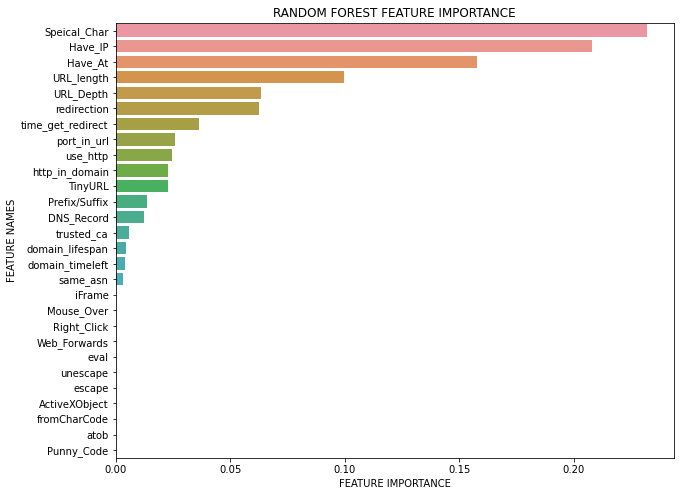

In [61]:
fi_df = var_imp

fi_df.sort_values(by=['importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['importance'], y=names)
#Add chart labels
plt.title('RANDOM FOREST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# Testing

In [43]:
from feature_extraction import *

classifier = joblib.load('rf_final.pkl')

ext = Extractor()
url = "http://35.211.157.248/wordpress/wp-content/plugins/kcupikfcsj/adn/one%202"
Vector = np.array(ext(url)[:-1])
print(Vector)
prediction = classifier.predict(Vector.reshape(1, -1))
print(prediction)

Domain Age:  4747
[5 0 0 1 6 5 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0]
[1]


In [144]:
black[0]

{'_id': '604bb52f6a1161c2e7d8608c',
 'url': 'http://2021-lmht.gq/*',
 'type': 'scam',
 'level': 'high',
 'meta': {}}

In [ ]:
for i in black:
    Vector = np.array(ext(i['url'])).reshape(1, -1)
    
    prediction = classifier.predict(Vector )
    print(prediction)

Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Domain Age:  1826
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  366
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0]
Domain Age:  5843
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  1096
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  1096
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1